# Przykład analizy na zaliczenie


Przedmiotem analizy powinien być trend lub zjawisko w sieci. Może to być analiza ruchu na konkretnej stronie www (dane z google analitics np. cvr.com.vn) lub dane z innego źródła (np. Google Trends).

Praca powinna zawierać:
- opis problemu
- źródło pozyskania danych
- wizualizacje 
- prognozę 
- wnioski (krótko)

Preferowana forma pracy: Notatnik Jupyter Nootebook lub plik Word / PDF

Prace należy przesłać mailem lub udstępnić na githubie marcinkieruzel

<a target="_blank" href="https://colab.research.google.com/github/marcinkieruzel/analiza_trendow_w_internecie/blob/main/example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Analiza ruchu na stronie www

Dane pochodzą ze Google Analitics strony cvr.com.vn 

Interesuje mnie analiza ruchu na stronie www i próba predykcji przyszłego ruchu uwzględniającego trend.

Używam modelu Facebook Prophet

In [20]:
import pandas as pd

# Wczytanie danych z pliku CSV
data = pd.read_csv('all.csv')

print(data.head())

# Konwersja kolumny 'Date' na typ daty
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Ustawienie kolumny 'Date' jako indeks
data.set_index('Date', inplace=True)

# Sortowanie danych po dacie
data.sort_index(inplace=True)

print(data.head())

       Date  active_users_mobile  active_users_desktop  active_users_total
0  20251230                   97                     3                 700
1  20260105                   77                     1                 688
2  20260101                  111                    12                 674
3  20251231                   86                     2                 618
4  20260102                   95                     1                 590
            active_users_mobile  active_users_desktop  active_users_total
Date                                                                     
2025-12-04                   61                     1                 243
2025-12-05                   68                     0                 236
2025-12-06                   60                     1                 195
2025-12-07                   55                     2                 274
2025-12-08                   55                     0                 246


12:35:45 - cmdstanpy - INFO - Chain [1] start processing
12:35:45 - cmdstanpy - INFO - Chain [1] done processing


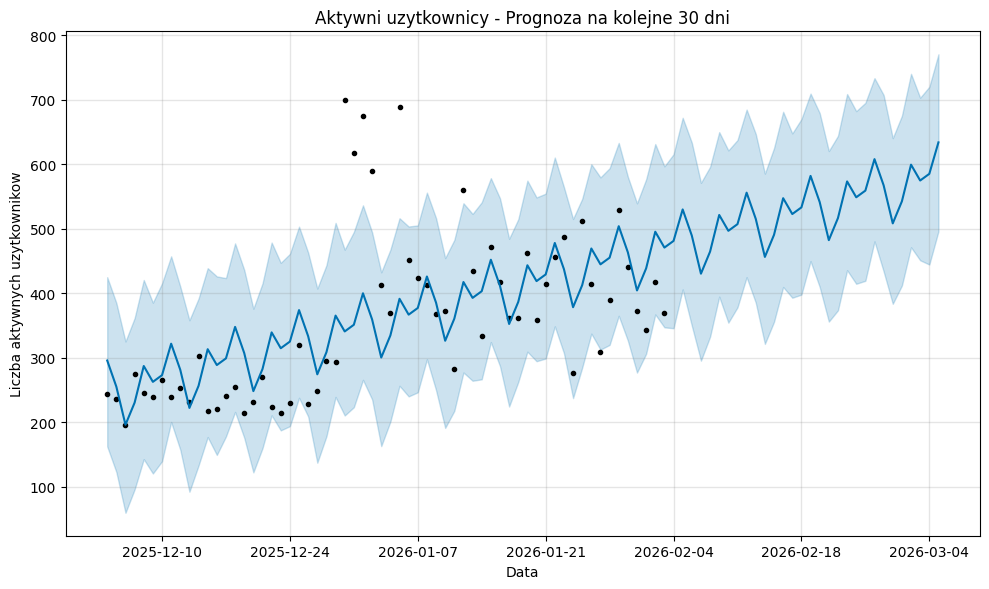

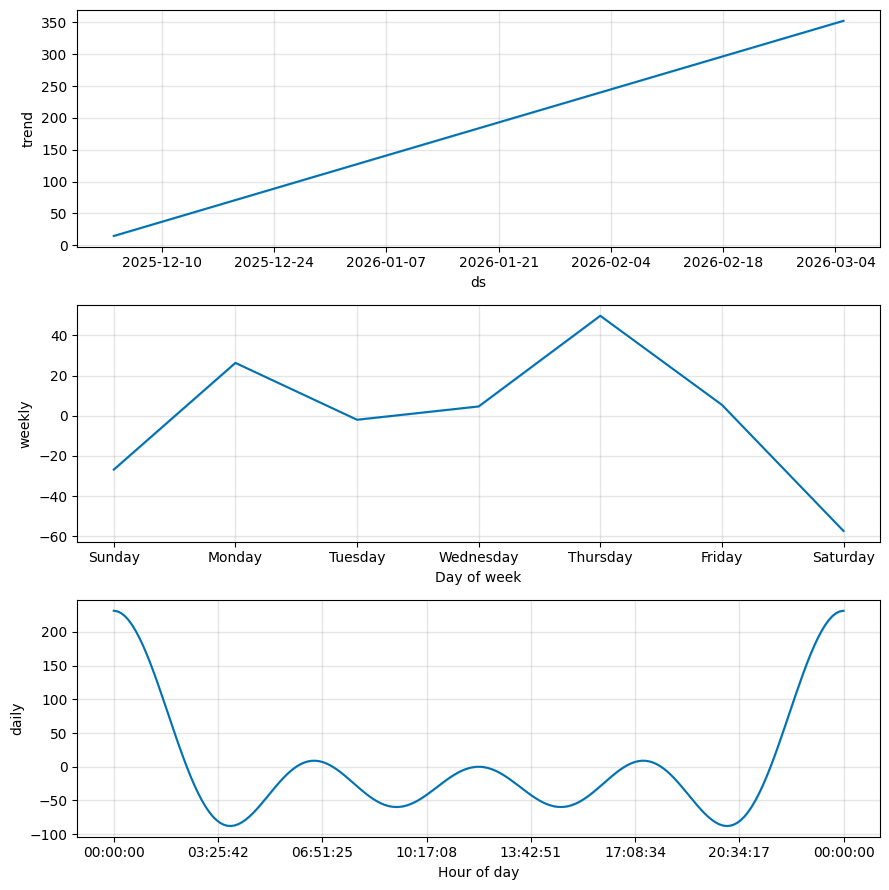

Prognoza na kolejne 30 dni:
        ds       yhat  yhat_lower  yhat_upper
2026-02-04 481.014549  345.698536  615.306599
2026-02-05 529.803557  405.893206  671.840871
2026-02-06 489.243744  349.566166  633.280804
2026-02-07 430.239091  295.356588  571.070541
2026-02-08 464.460391  332.581661  595.814917
2026-02-09 521.238396  394.670919  649.666234
2026-02-10 496.679857  354.309574  621.270455
2026-02-11 507.000868  378.031529  637.348184
2026-02-12 555.789877  424.812432  684.589877
2026-02-13 515.230064  385.304270  646.819973
2026-02-14 456.225411  321.379982  585.353670
2026-02-15 490.446710  355.609088  624.911799
2026-02-16 547.224716  409.606774  681.199545
2026-02-17 522.666176  392.944066  647.608509
2026-02-18 532.987188  397.782937  669.801518
2026-02-19 581.776196  449.718796  709.315231
2026-02-20 541.216383  409.644071  679.173236
2026-02-21 482.211731  355.931770  620.316096
2026-02-22 516.433030  373.422720  643.872701
2026-02-23 573.211035  435.587257  708.658883
2026-0

In [21]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Przygotowanie danych dla Propheta (wymaga kolumn 'ds' i 'y')
df_prophet = data[['active_users_total']].reset_index()
df_prophet.columns = ['ds', 'y']

# Utworzenie i dopasowanie modelu z sezonowoscia dzienna
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Utworzenie ramki danych z przyszlymi datami (30 dni do przodu)
future = model.make_future_dataframe(periods=30)

# Generowanie prognozy
forecast = model.predict(future)

# Wykres prognozy
fig = model.plot(forecast)
plt.title('Aktywni uzytkownicy - Prognoza na kolejne 30 dni')
plt.xlabel('Data')
plt.ylabel('Liczba aktywnych uzytkownikow')
plt.tight_layout()
plt.show()

# Wykres skladowych modelu (trend, sezonowosc tygodniowa/dzienna)
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Wyswietlenie prognozowanych wartosci na kolejny miesiac
print("Prognoza na kolejne 30 dni:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30).to_string(index=False))

## Wyjaśnienie analizy Prophet

**Facebook Prophet** to model szeregów czasowych opracowany przez Meta (Facebook), który automatycznie wykrywa:
- **Trend** – ogólny kierunek zmian danych w czasie (wzrost lub spadek),
- **Sezonowość tygodniową** – powtarzające się wzorce w cyklu tygodniowym (np. więcej użytkowników w określone dni tygodnia),
- **Sezonowość dzienną** – wahania w ciągu dnia.

### Jak czytać wykresy:
- **Wykres prognozy** – czarne punkty to dane rzeczywiste, niebieska linia to prognoza modelu, a jasnoniebieski obszar to **przedział ufności** (zakres, w którym z dużym prawdopodobieństwem znajdą się przyszłe wartości).
- **Wykres składowych** – rozbija prognozę na poszczególne komponenty: trend, sezonowość tygodniową i dzienną, co pozwala zrozumieć, co wpływa na liczbę użytkowników.

### Kolumny w tabeli prognozy:
| Kolumna | Znaczenie |
|---|---|
| `ds` | Data |
| `yhat` | Prognozowana wartość (liczba aktywnych użytkowników) |
| `yhat_lower` | Dolna granica przedziału ufności |
| `yhat_upper` | Górna granica przedziału ufności |

---

## Wnioski z analizy

### 1. Dane wejściowe
- Analiza obejmuje **62 dni** (od 4 grudnia 2025 do 3 lutego 2026).
- Średnia dzienna liczba aktywnych użytkowników wynosi **359**, przy czym wartości wahają się od 195 do 700.

### 2. Wyraźny trend wzrostowy
- Średnia z pierwszego tygodnia to **243** użytkowników, a z ostatniego **409** – co oznacza **wzrost o ok. 69%**.
- Model Prophet potwierdza ten rosnący trend, prognozując dalszy wzrost w kolejnym miesiącu.
- Widzimy jednak wyrażne outliery

### 3. Prognoza na kolejne 30 dni
- Prognozowana średnia liczba użytkowników to **ok. 532** dziennie.
- Wartości prognozowane wahają się od **430 do 634**, co sugeruje kontynuację trendu wzrostowego.

### 4. Dominacja ruchu mobilnego
- Użytkownicy mobilni stanowią **24,2%** zidentyfikowanego ruchu, a desktopowi jedynie **0,7%**.
- Pozostałe ~75% ruchu pochodzi z innych źródeł nieuwzględnionych w podziale mobile/desktop.

### 5. Zalecenia
- **Optymalizacja pod urządzenia mobilne** powinna być priorytetem ze względu na dominację tego kanału.
- Należy monitorować, czy trend wzrostowy się utrzyma – prognoza opiera się na stosunkowo krótkim okresie danych (62 dni), co może wpływać na jej dokładność.
- Warto rozszerzyć analizę o dłuższy okres danych, aby Prophet mógł lepiej wykryć sezonowość i dostarczyć bardziej wiarygodne prognozy.